<a href="https://colab.research.google.com/github/Dasji-6060/Abhijeet_Projects/blob/main/ML_CAR_ANALYZER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Analyzer

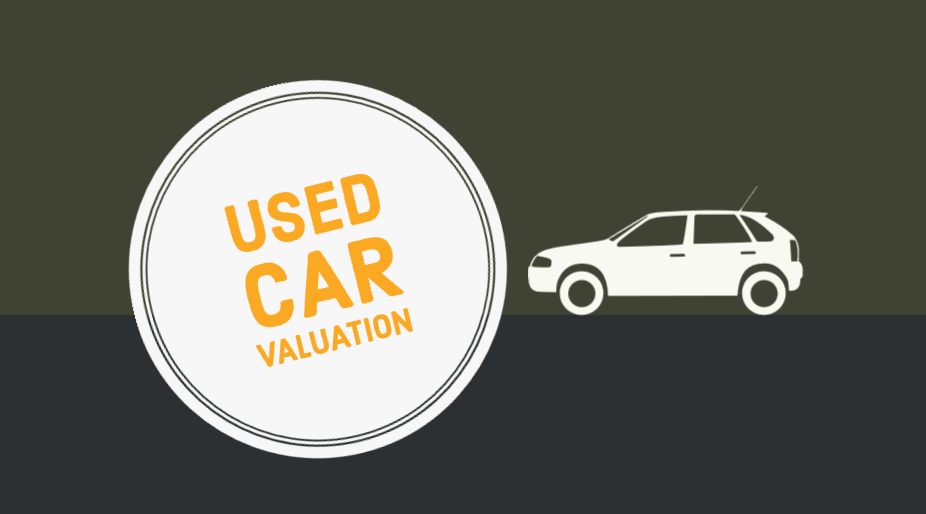

# **Project Flowchart**
1.**Define the problem statement** - Be Sure What you want to do & Achieve

2.**Data Collection** - Take the dataset and store it.

3.**Data Preprocessing**- Prepare the recipe, before the food.

4.**Exploratory Data Analysis (EDA)** - Get the insights

5.**Model Selection, Training & Evaluation** - Choose, train, and assess a suitable     model to solve the defined problem.


## 1. Define the problem statement:

### Goal:
Predict the selling price of a car based on various features like year, make, model, trim, body, transmission, odometer, condition, etc.

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Collection

In [ ]:
# Importing Dataset
car_prices = pd.read_csv('car_prices.csv')

In [ ]:
# First 5 Rows Data
car_prices.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
# Last 5 Rows Data
car_prices.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
26715,2014,Kia,Sportage,LX,SUV,automatic,kndpb3ac5e7562820,wi,37.0,18827.0,brown,gray,kia motors america inc,15500,15900,Wed Jan 21 2015 02:00:00 GMT-0800 (PST)
26716,2014,Kia,Sorento,LX,SUV,automatic,5xykt3a67eg466224,ga,5.0,6313.0,red,beige,kia motors finance,18050,17700,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)
26717,2014,Kia,Soul,Base,Wagon,automatic,kndjn2a2xe7007036,wi,44.0,31233.0,white,black,kia motors america inc,11600,11400,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
26718,2014,Kia,Soul,Base,Wagon,automatic,kndjn2a2xe7717036,tn,38.0,15486.0,green,black,exeter finance corp,12050,9500,Wed Dec 31 2014 10:30:00 GMT-0800 (PST)
26719,2014,Lexus,CT 200h,Base,Hatchback,automatic,jthkd5bh0e2180376,fl,46.0,11922.0,gray,brown,lexus of north miami,26500,24000,W


In [ ]:
# Shape of the Dataset
car_prices.shape

(26720, 16)

In [ ]:
# Columns Name
car_prices.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [ ]:
# Get basic information about the dataset
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26720 entries, 0 to 26719
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          26720 non-null  int64  
 1   make          26589 non-null  object 
 2   model         26588 non-null  object 
 3   trim          26472 non-null  object 
 4   body          25810 non-null  object 
 5   transmission  23658 non-null  object 
 6   vin           26720 non-null  object 
 7   state         26720 non-null  object 
 8   condition     19003 non-null  float64
 9   odometer      26685 non-null  float64
 10  color         26641 non-null  object 
 11  interior      26641 non-null  object 
 12  seller        26720 non-null  object 
 13  mmr           26720 non-null  int64  
 14  sellingprice  26720 non-null  int64  
 15  saledate      26720 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 3.3+ MB


In [ ]:
# Summary statistics
car_prices.describe()

,year,condition,odometer,mmr,sellingprice
count,26720.000000,19003.000000,26685.000000,26720.000000,26720.000000
mean,2008.384244,28.535021,88361.881319,11300.335891,10914.383271
std,3.653731,13.390753,56550.902434,9436.409596,9435.270854
min,1986.000000,1.000000,1.000000,25.000000,1.000000
25%,2006.000000,21.000000,40750.000000,4500.000000,4100.000000
50%,2008.000000,29.000000,86450.000000,8900.000000,8500.000000
75%,2011.000000,39.000000,123885.000000,15750.000000,15300.000000
max,2015.000000,49.000000,999999.000000,157000.000000,154000.000000


## 3. Data Preprocessing

**Missing Values Check**

In [ ]:
# Handling null values:
print(car_prices.isnull().sum())

year               0
make             131
model            132
trim             248
body             910
transmission    3062
vin                0
state              0
condition       7717
odometer          35
color             79
interior          79
seller             0
mmr                0
sellingprice       0
saledate           0
dtype: int64


There are several strategies we can use to deal with missing data, including:

1.Removing rows or columns with missing values

2.Imputing missing values with a specific value (e.g., mean, median, mode)

3.Using algorithms that support missing values

Here’s I can handle each column with missing values:

1.Removing rows/columns with missing values: If a column has too many missing values or if the missing values are randomly scattered and not critical, you might consider dropping these rows or columns.

2.Imputing missing values: For numerical columns, you can impute missing values with the mean, median, or mode. For categorical columns, you can use the mode (most frequent value).

In [ ]:
# Impute numerical columns with median
car_prices['odometer'].fillna(car_prices['odometer'].median(), inplace=True)

# Impute categorical columns with mode
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior', 'condition']
for col in categorical_columns:
    car_prices[col].fillna(car_prices[col].mode()[0], inplace=True)

# Drop rows with missing values in seller, mmr, sellingprice, saledate
car_prices.dropna(subset=['seller', 'mmr', 'sellingprice', 'saledate'], inplace=True)

# Check again for missing values to ensure all are handled
print(car_prices.isnull().sum())


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


### 1. Columns with a small number of missing values:


odometer (78 missing): Impute with median or mean.

color (269 missing): Impute with mode.

interior (269 missing): Impute with mode.

seller, mmr, sellingprice, saledate (1 missing): Drop these rows as they have only one missing value.

### 2.Columns with a moderate number of missing values:

make (1303 missing): Impute with mode.

model (1331 missing): Impute with mode.

trim (1632 missing): Impute with mode.

###3.Columns with a large number of missing values:

body (4176 missing): Impute with mode or drop if not critical.

transmission (19109 missing): Impute with mode or drop if not critical.

condition (11793 missing): Impute with mode or drop if not critical.

**Duplicate Check**

In [ ]:
#Checking for duplicate values
car_prices.duplicated().sum()

0

As we can see there are no duplicate values, so we can move ahead.

**Encode Categorical Variables and Scale Numeric** **Variables**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target
X = car_prices.drop(columns=['sellingprice', 'vin', 'saledate'])
y = car_prices['sellingprice']

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numeric data: impute missing values and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess data
X_preprocessed = preprocessor.fit_transform(X)


## 4. EDA

**Visualize** **Distributions**

Visualization of data distributions is an essential part of exploratory data analysis (EDA). It helps us understand the underlying patterns, identify potential anomalies, and get insights into the relationships between variables. In this project, we focused on visualizing the distributions of both the target variable (selling price) and various features in the dataset. Here’s a detailed description of the visualizations we created:

**1. Distribution** **of** **Selling** **Price**

**Purpose**: To understand the range, central tendency, and spread of car selling prices in the dataset.

**Visualization** **Method**: Histogram with a Kernel Density Estimate (KDE) overlay.

**Insights**: This plot shows how car prices are distributed. The KDE overlay helps to smooth the histogram, giving a clearer view of the distribution's shape. We can identify if the data is skewed, has any peaks, and the general range of car prices.

**2. Distribution of Numeric Features**

**Purpose:** To examine the distributions of other numeric features in the dataset, such as year, odometer, etc.

**Visualization Method**: Histograms for each numeric feature.

**Insights:** These histograms provide a visual summary of each numeric feature’s distribution. We can observe if features like odometer have normal distributions, identify potential outliers, and understand the variability within each feature.

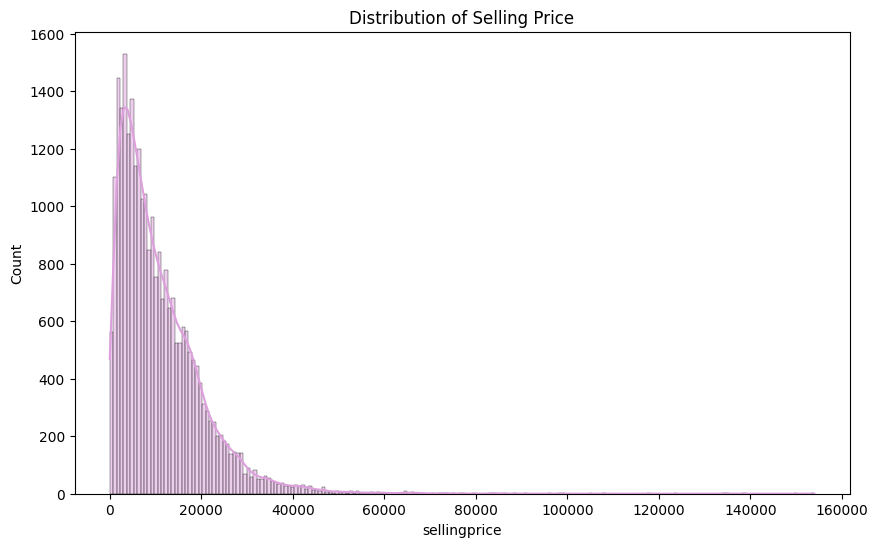

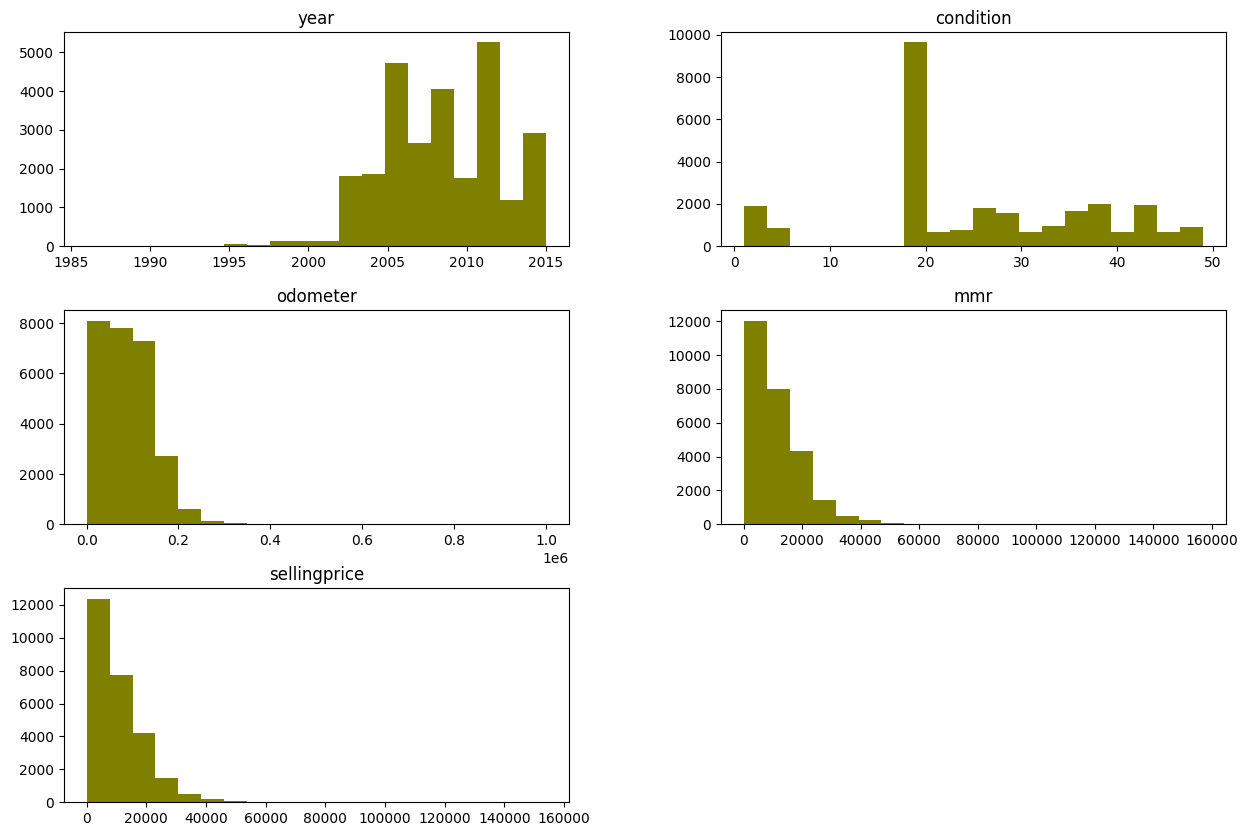

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(car_prices['sellingprice'], kde=True,color="plum")
plt.title('Distribution of Selling Price')
plt.show()

# Distribution of numeric features
numeric_features = car_prices.select_dtypes(include=['int64', 'float64']).columns
car_prices[numeric_features].hist(figsize=(15, 10), bins=20,color="olive", grid=False)
plt.show()

### Correlation Matrix
Calculate and visualize the correlation matrix for numeric features to understand the relationships between them.



**Purpose**: To understand the relationships and correlations between numeric features.

**Visualization Method:** Heatmap of the correlation matrix.

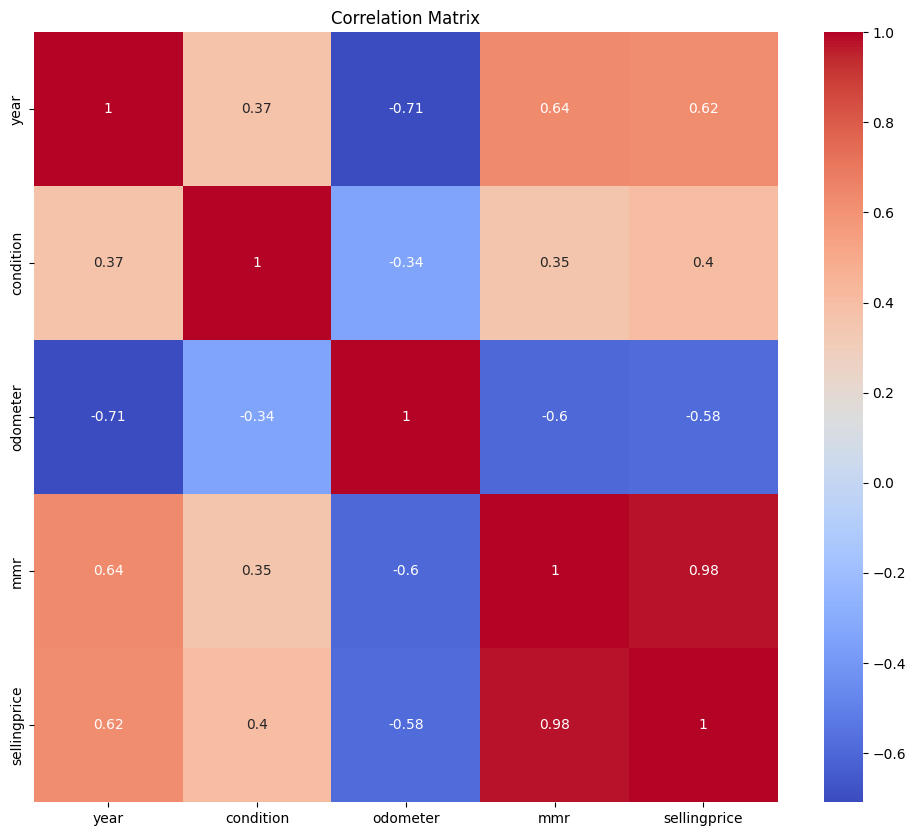

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(car_prices[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Insights:** The heatmap visually represents the correlation coefficients between pairs of numeric features. It helps to identify which features are strongly correlated with each other and with the target variable (selling price). Strong correlations might indicate multicollinearity or important predictive features.


### Pairplot
Visualize relationships between pairs of features.



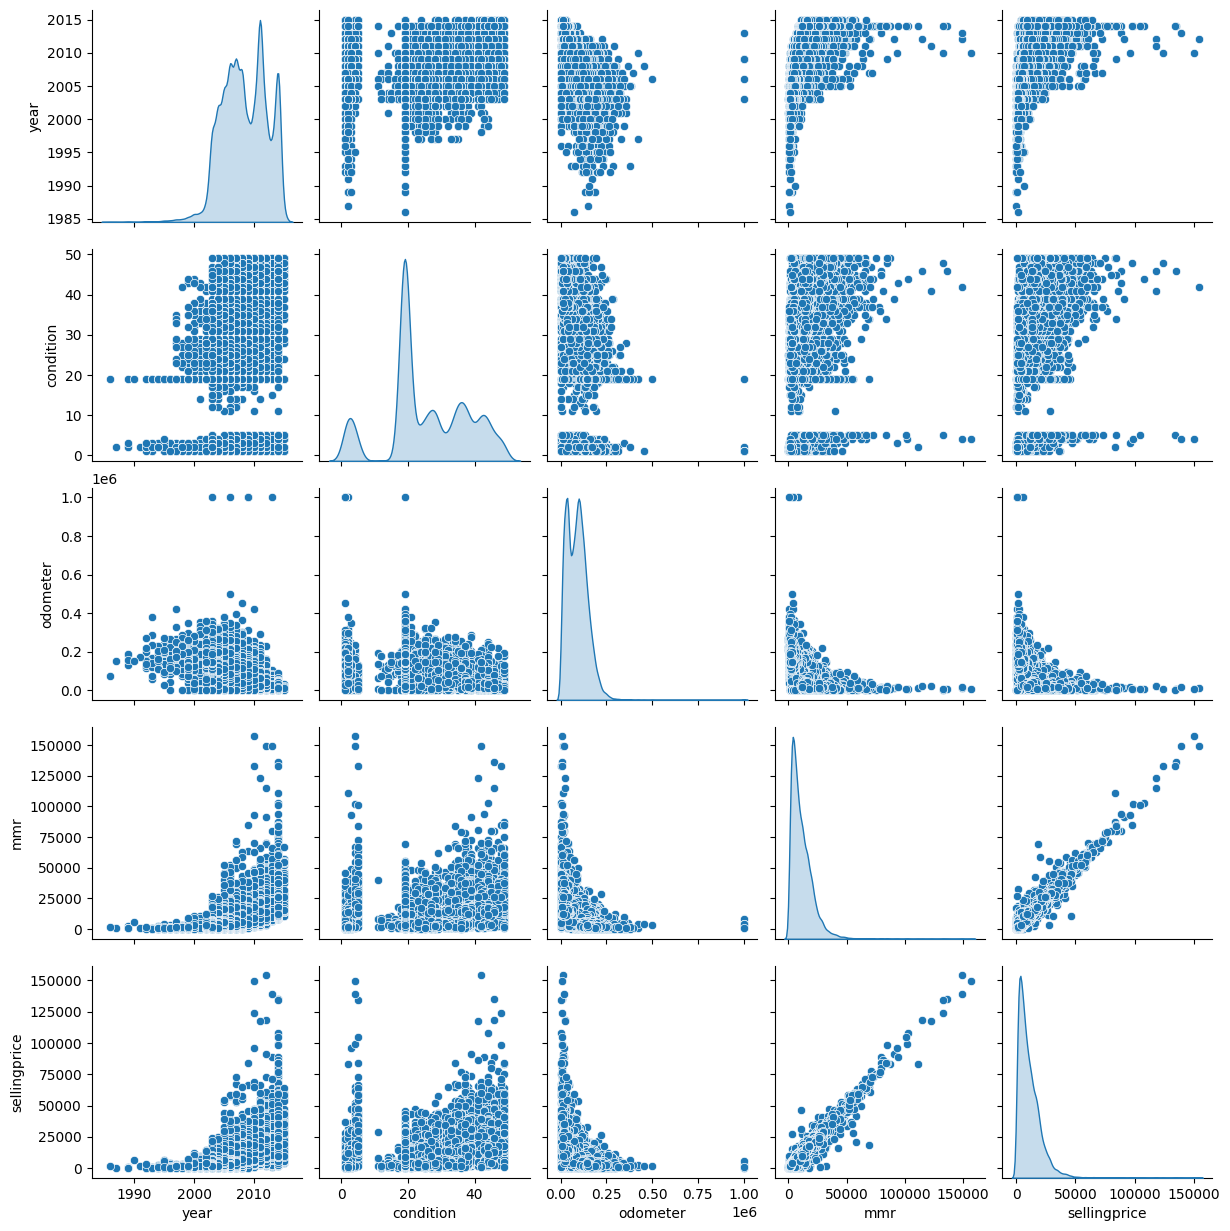

In [ ]:
sns.pairplot(car_prices, vars=numeric_features, diag_kind='kde', )
plt.show()


## 5.Model Selection, Training & Evaluation

**I**. **Model** **Selection**

### Using Random Forest and Gradient Boosting

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target
X = car_prices.drop(columns=['sellingprice', 'vin', 'saledate'])
y = car_prices['sellingprice']

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numeric data: impute missing values and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess data
X_preprocessed = preprocessor.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Define parameter grid for Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define parameter grid for Gradient Boosting hyperparameter tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Set up GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')





**II**. **Training**

In [ ]:
# Fit grid search for Random Forest
grid_search_rf.fit(X_train, y_train)

# Fit grid search for Gradient Boosting
grid_search_gb.fit(X_train, y_train)

# Get best estimators and best parameters
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_
best_params_rf = grid_search_rf.best_params_
best_params_gb = grid_search_gb.best_params_

print(f'Best Parameters for Random Forest: {best_params_rf}')
print(f'Best Parameters for Gradient Boosting: {best_params_gb}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


**III**. **Evaluation**

In [ ]:
# Cross-validation scores
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_gb = cross_val_score(best_gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_rf = -cv_scores_rf.mean()
cv_mse_gb = -cv_scores_gb.mean()

print(f'Cross-Validated MSE for Random Forest: {cv_mse_rf}')
print(f'Cross-Validated MSE for Gradient Boosting: {cv_mse_gb}')

# Evaluate on test set
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Mean Squared Error on Test Set for Random Forest: {mse_rf}')
print(f'Mean Squared Error on Test Set for Gradient Boosting: {mse_gb}')

print(f'R^2 Score on Test Set for Random Forest: {r2_rf}')
print(f'R^2 Score on Test Set for Gradient Boosting: {r2_gb}')

**Evaluation Metrics:**

**Mean** **Squared** **Error** (**MSE**):

Measures the average squared difference between the predicted and actual values. Lower values indicate better model performance.

**R**-**squared** (**R**²):

Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values indicate better model performance.